In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [2]:
#Loading the dataset and printing out the shape
cc_df = pd.read_csv('creditcard.csv')
print(f"Credit card dataset shape: {cc_df.shape}")
cc_df.head()

Credit card dataset shape: (211990, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:

#Describes the dataset
cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,211990.000000,211990.000000,211990.000000,211990.000000,211990.000000,211990.000000,211990.000000,211990.000000,211990.000000,211990.000000,...,211989.000000,211989.000000,211989.000000,211989.000000,211989.000000,211989.000000,211989.000000,211989.000000,211989.000000,211989.000000
mean,74338.899245,-0.082446,-0.004057,0.255986,0.060509,-0.087386,0.040294,-0.038154,0.010719,0.006475,...,-0.010891,-0.035568,-0.013398,0.002730,0.050026,0.004273,0.000826,0.001469,90.103802,0.001859
std,36867.401364,1.909113,1.631394,1.467115,1.404102,1.364220,1.315733,1.218483,1.205495,1.130097,...,0.736679,0.699081,0.617944,0.604731,0.499528,0.487487,0.395790,0.318663,248.408194,0.043071
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,45761.000000,-0.953498,-0.589128,-0.445879,-0.807693,-0.766842,-0.719268,-0.571768,-0.187794,-0.662056,...,-0.226214,-0.534973,-0.168097,-0.345598,-0.256227,-0.331384,-0.068392,-0.044879,5.990000,0.000000
50%,69773.000000,-0.058291,0.075315,0.437946,0.061376,-0.146809,-0.226442,-0.000192,0.038178,-0.070713,...,-0.039158,-0.023523,-0.026425,0.050242,0.090839,-0.061591,0.004778,0.017286,23.080000,0.000000
75%,112066.750000,1.227441,0.781114,1.189327,0.863249,0.498306,0.440132,0.517127,0.334601,0.620404,...,0.159354,0.446748,0.120191,0.424426,0.379590,0.257339,0.088927,0.077860,79.740000,0.000000
max,138664.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [4]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211990 entries, 0 to 211989
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    211990 non-null  float64
 1   V1      211990 non-null  float64
 2   V2      211990 non-null  float64
 3   V3      211990 non-null  float64
 4   V4      211990 non-null  float64
 5   V5      211990 non-null  float64
 6   V6      211990 non-null  float64
 7   V7      211990 non-null  float64
 8   V8      211990 non-null  float64
 9   V9      211990 non-null  float64
 10  V10     211989 non-null  float64
 11  V11     211989 non-null  float64
 12  V12     211989 non-null  float64
 13  V13     211989 non-null  float64
 14  V14     211989 non-null  float64
 15  V15     211989 non-null  float64
 16  V16     211989 non-null  float64
 17  V17     211989 non-null  float64
 18  V18     211989 non-null  float64
 19  V19     211989 non-null  float64
 20  V20     211989 non-null  float64
 21  V21     21

In [5]:
#Checks for null values
cc_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


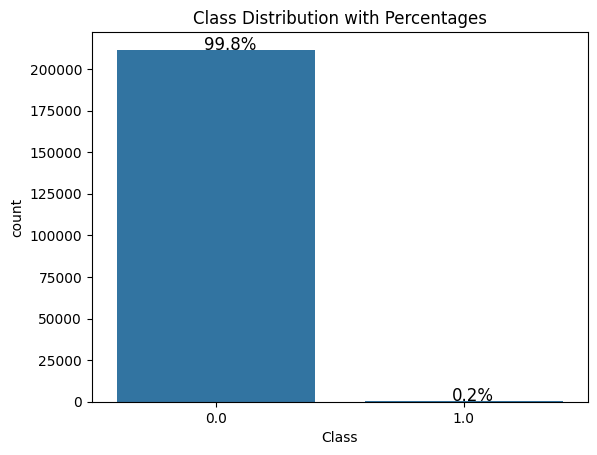

In [6]:
#Displays class distribution with percentages
ax = sns.countplot(x='Class', data=cc_df)
plt.title('Class Distribution with Percentages')

total = len(cc_df['Class'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.show()

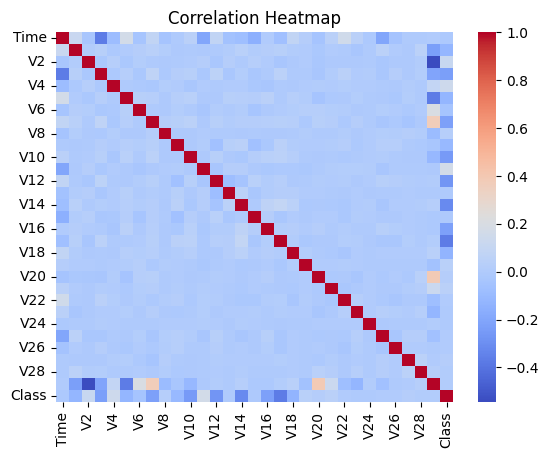

In [7]:
#correlation heatmap
sns.heatmap(cc_df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
#Scaling Amount and time
cc_df['Amount'] = StandardScaler().fit_transform(cc_df['Amount'].values.reshape(-1,1))
cc_df['Time'] = StandardScaler().fit_transform(cc_df['Time'].values.reshape(-1,1))


In [15]:
# Logistic regression model
cc_df.dropna(inplace=True)
X = cc_df.drop('Class', axis=1)
y = cc_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test,y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression Accuracy: 0.999127317326289
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42324
         1.0       0.84      0.62      0.71        74

    accuracy                           1.00     42398
   macro avg       0.92      0.81      0.86     42398
weighted avg       1.00      1.00      1.00     42398

ROC-AUC: 0.9742555498509567


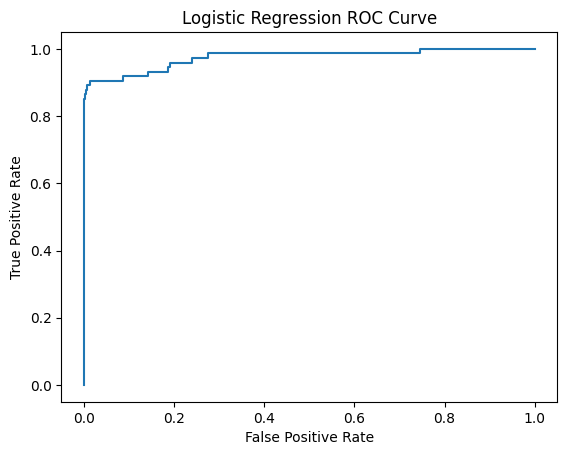

In [10]:
#ROC visual
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr)
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [11]:
#Random forest regression Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
rf_y_prob = rf.predict_proba(X_test)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test,rf_y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf_y_prob))

Random Forest Accuracy: 0.9995282796358319
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42324
         1.0       0.94      0.78      0.85        74

    accuracy                           1.00     42398
   macro avg       0.97      0.89      0.93     42398
weighted avg       1.00      1.00      1.00     42398

ROC-AUC: 0.958238664664097


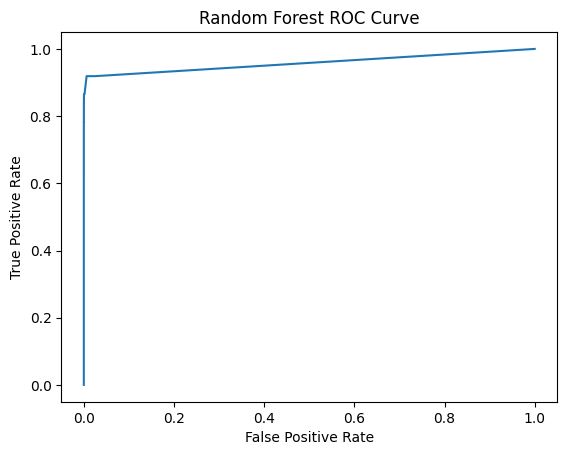

In [12]:
#ROC Visual
fpr, tpr, _ = roc_curve(y_test, rf_y_prob)
plt.plot(fpr, tpr)
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


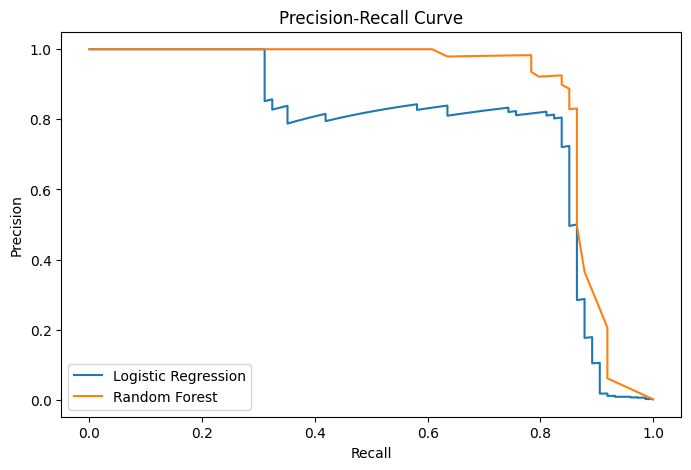

In [13]:
#Precision recall curve
prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_prob_lr)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, rf_y_prob)

plt.figure(figsize=(8,5))
plt.plot(rec_lr, prec_lr, label="Logistic Regression")
plt.plot(rec_rf, prec_rf, label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision-Recall Curve")
plt.show()
